In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
K_BEST = 20
N_SPLITS = 10
N_JOBS = 5
SCORING = [
    'accuracy',
    'f1_weighted',
    'precision_weighted',
    'recall_weighted',
    'roc_auc_ovr',
]

In [3]:
df = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


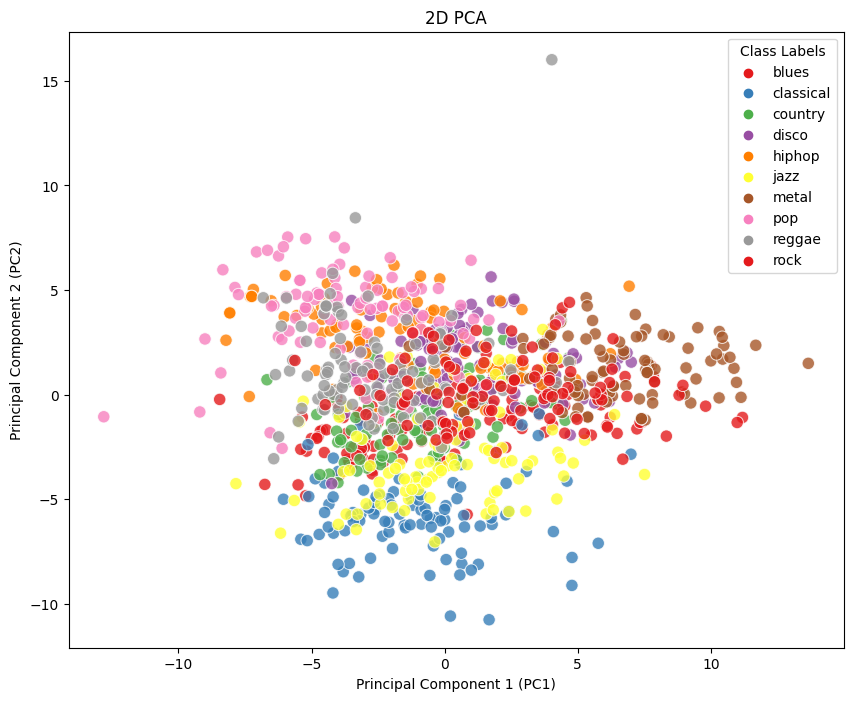

In [4]:
# Separate the features and labels
X = df.drop(columns=['filename', 'length', 'label'], axis=1)
y = df['label']

qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
X_pca = qt.fit_transform(X)

# Perform PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

# Create a DataFrame with the PCA components and labels
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_pca, palette='Set1', s=80, alpha=0.8)
plt.title('2D PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Class Labels', loc='upper right')
plt.show()

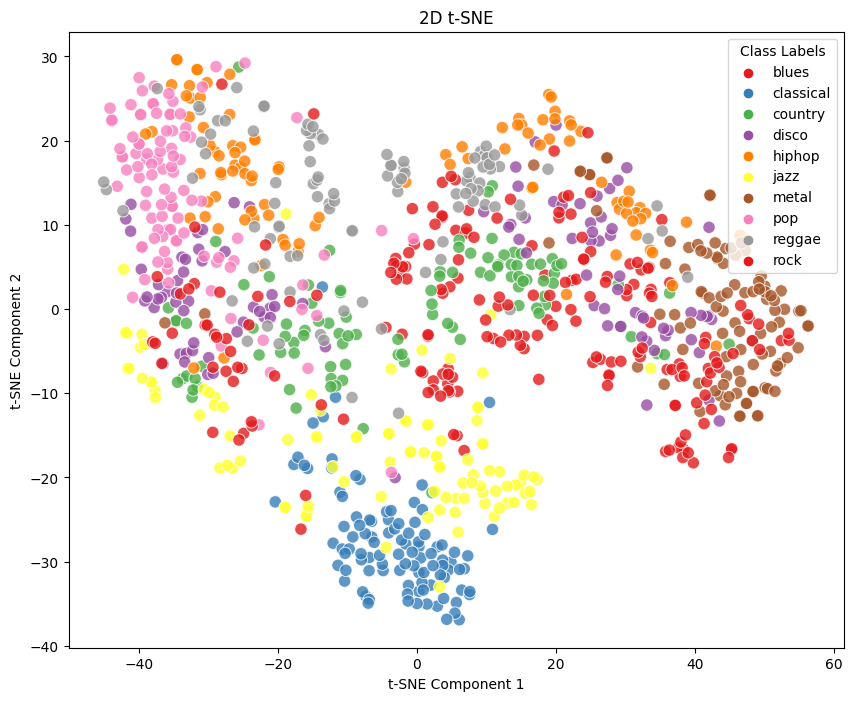

In [5]:
qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
X_tsne = qt.fit_transform(X)


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tsne)

# Create a DataFrame with the t-SNE components and labels
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = y

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', data=df_tsne, palette='Set1', s=80, alpha=0.8)
plt.title('2D t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class Labels', loc='upper right')
plt.show()

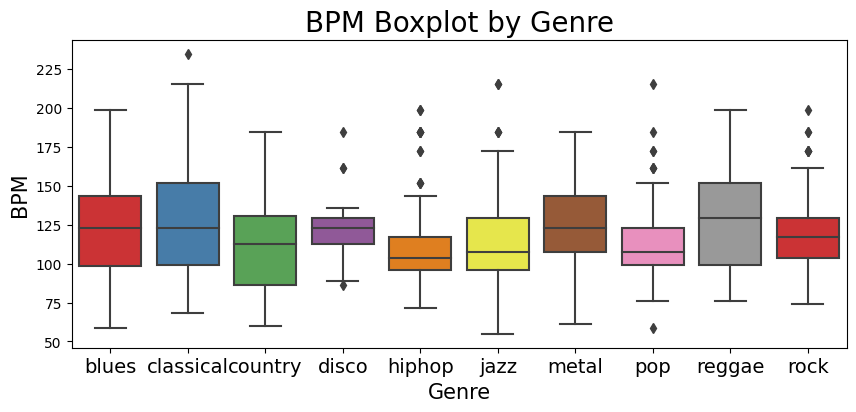

In [6]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(10, 4));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'Set1');

plt.title('BPM Boxplot by Genre', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [7]:
df = df.drop(columns=['filename', 'length'])

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df['label']

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int64

In [8]:
X = df.drop(columns=['label'])
y = df['label']

final_results = []

In [9]:
for c in X.columns:
    print(c)

print(len(list(X.columns)))

chroma_stft_mean
chroma_stft_var
rms_mean
rms_var
spectral_centroid_mean
spectral_centroid_var
spectral_bandwidth_mean
spectral_bandwidth_var
rolloff_mean
rolloff_var
zero_crossing_rate_mean
zero_crossing_rate_var
harmony_mean
harmony_var
perceptr_mean
perceptr_var
tempo
mfcc1_mean
mfcc1_var
mfcc2_mean
mfcc2_var
mfcc3_mean
mfcc3_var
mfcc4_mean
mfcc4_var
mfcc5_mean
mfcc5_var
mfcc6_mean
mfcc6_var
mfcc7_mean
mfcc7_var
mfcc8_mean
mfcc8_var
mfcc9_mean
mfcc9_var
mfcc10_mean
mfcc10_var
mfcc11_mean
mfcc11_var
mfcc12_mean
mfcc12_var
mfcc13_mean
mfcc13_var
mfcc14_mean
mfcc14_var
mfcc15_mean
mfcc15_var
mfcc16_mean
mfcc16_var
mfcc17_mean
mfcc17_var
mfcc18_mean
mfcc18_var
mfcc19_mean
mfcc19_var
mfcc20_mean
mfcc20_var
57


In [10]:
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)
qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
fs = SelectKBest(k=K_BEST)
clf = LogisticRegression(max_iter=3000)
pipe = Pipeline(steps=[
    ('quantile-transformer', qt),
    #('k-best-feature-selector', fs),
    ('classifier', clf)
])
cv_results = cross_validate(pipe, X, y=y, cv=cv, scoring=SCORING, n_jobs=N_JOBS)
df_results = pd.DataFrame(cv_results)
df_results = df_results.sort_values(by=['test_f1_weighted', 'test_accuracy'], ascending=False)

df_results = df_results.drop(columns=['fit_time', 'score_time'])
df_results = df_results.mean(axis=0)
df_results['classifier'] = clf.__class__.__name__
final_results.append(df_results)

In [11]:
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)
qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
fs = SelectKBest(k=K_BEST)
clf = RandomForestClassifier(n_estimators=333)
pipe = Pipeline(steps=[
    ('quantile-transformer', qt),
    ('k-best-feature-selector', fs),
    ('classifier', clf)
])
cv_results = cross_validate(pipe, X, y=y, cv=cv, scoring=SCORING,n_jobs=N_JOBS)
df_results = pd.DataFrame(cv_results)
df_results = df_results.sort_values(by=['test_f1_weighted', 'test_accuracy'], ascending=False)

df_results = df_results.drop(columns=['fit_time', 'score_time'])
df_results = df_results.mean(axis=0)
df_results['classifier'] = clf.__class__.__name__
final_results.append(df_results)

In [12]:
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)
qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
fs = SelectKBest(k=K_BEST)
clf = GradientBoostingClassifier(n_estimators=333)
pipe = Pipeline(steps=[
    ('quantile-transformer', qt),
    ('k-best-feature-selector', fs),
    ('classifier', clf)
])
cv_results = cross_validate(pipe, X, y=y, cv=cv, scoring=SCORING,n_jobs=N_JOBS)
df_results = pd.DataFrame(cv_results)
df_results = df_results.sort_values(by=['test_f1_weighted', 'test_accuracy'], ascending=False)

df_results = df_results.drop(columns=['fit_time', 'score_time'])
df_results = df_results.mean(axis=0)
df_results['classifier'] = clf.__class__.__name__
final_results.append(df_results)

In [13]:
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)
qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
fs = SelectKBest(k=K_BEST)
clf = AdaBoostClassifier(n_estimators=333)
pipe = Pipeline(steps=[
    ('quantile-transformer', qt),
    ('k-best-feature-selector', fs),
    ('classifier', clf)
])
cv_results = cross_validate(pipe, X, y=y, cv=cv, scoring=SCORING,n_jobs=N_JOBS)
df_results = pd.DataFrame(cv_results)
df_results = df_results.sort_values(by=['test_f1_weighted', 'test_accuracy'], ascending=False)

df_results = df_results.drop(columns=['fit_time', 'score_time'])
df_results = df_results.mean(axis=0)
df_results['classifier'] = clf.__class__.__name__
final_results.append(df_results)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [14]:
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)
qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
fs = SelectKBest(k=K_BEST)
clf = MLPClassifier([50, 50])
pipe = Pipeline(steps=[
    ('quantile-transformer', qt),
    ('k-best-feature-selector', fs),
    ('classifier', clf)
])
cv_results = cross_validate(pipe, X, y=y, cv=cv, scoring=SCORING,n_jobs=N_JOBS)
df_results = pd.DataFrame(cv_results)
df_results = df_results.sort_values(by=['test_f1_weighted', 'test_accuracy'], ascending=False)

df_results = df_results.drop(columns=['fit_time', 'score_time'])
df_results = df_results.mean(axis=0)
df_results['classifier'] = clf.__class__.__name__
final_results.append(df_results)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

In [15]:
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)
qt = QuantileTransformer(n_quantiles=850, output_distribution="normal", ignore_implicit_zeros=False, subsample=850)
fs = SelectKBest(k=K_BEST)
clf = KNeighborsClassifier()
pipe = Pipeline(steps=[
    ('quantile-transformer', qt),
    ('k-best-feature-selector', fs),
    ('classifier', clf)
])
cv_results = cross_validate(pipe, X, y=y, cv=cv, scoring=SCORING,n_jobs=N_JOBS)
df_results = pd.DataFrame(cv_results)
df_results = df_results.sort_values(by=['test_f1_weighted', 'test_accuracy'], ascending=False)

df_results = df_results.drop(columns=['fit_time', 'score_time'])
df_results = df_results.mean(axis=0)
df_results['classifier'] = clf.__class__.__name__
final_results.append(df_results)

In [16]:
final_results = pd.DataFrame(final_results)
final_results = final_results.sort_values(by=['test_accuracy', 'test_f1_weighted', 'test_roc_auc_ovr'], ascending=False)
cols = ['classifier'] + final_results.columns.tolist()[:-1]
final_results = final_results[cols]
display(final_results)

,classifier,test_accuracy,test_f1_weighted,test_precision_weighted,test_recall_weighted,test_roc_auc_ovr
0,LogisticRegression,0.737,0.734861,0.750893,0.737,0.955533
4,MLPClassifier,0.692,0.690025,0.705691,0.692,0.945767
1,RandomForestClassifier,0.679,0.675568,0.689443,0.679,0.944978
5,KNeighborsClassifier,0.652,0.647750,0.676190,0.652,0.901244
2,GradientBoostingClassifier,0.649,0.649315,0.670617,0.649,0.932756
3,AdaBoostClassifier,0.334,0.287960,0.325695,0.334,0.707222


In [17]:
print(final_results.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
classifier & test_accuracy & test_f1_weighted & test_precision_weighted & test_recall_weighted & test_roc_auc_ovr \\
\midrule
LogisticRegression & 0.737000 & 0.734861 & 0.750893 & 0.737000 & 0.955533 \\
MLPClassifier & 0.692000 & 0.690025 & 0.705691 & 0.692000 & 0.945767 \\
RandomForestClassifier & 0.679000 & 0.675568 & 0.689443 & 0.679000 & 0.944978 \\
KNeighborsClassifier & 0.652000 & 0.647750 & 0.676190 & 0.652000 & 0.901244 \\
GradientBoostingClassifier & 0.649000 & 0.649315 & 0.670617 & 0.649000 & 0.932756 \\
AdaBoostClassifier & 0.334000 & 0.287960 & 0.325695 & 0.334000 & 0.707222 \\
\bottomrule
\end{tabular}



In [18]:
print(final_results[['classifier', 'test_accuracy', 'test_f1_weighted', 'test_roc_auc_ovr']].to_latex(index=False, caption='cross val'))

\begin{table}
\caption{cross val}
\begin{tabular}{lrrr}
\toprule
classifier & test_accuracy & test_f1_weighted & test_roc_auc_ovr \\
\midrule
LogisticRegression & 0.737000 & 0.734861 & 0.955533 \\
MLPClassifier & 0.692000 & 0.690025 & 0.945767 \\
RandomForestClassifier & 0.679000 & 0.675568 & 0.944978 \\
KNeighborsClassifier & 0.652000 & 0.647750 & 0.901244 \\
GradientBoostingClassifier & 0.649000 & 0.649315 & 0.932756 \\
AdaBoostClassifier & 0.334000 & 0.287960 & 0.707222 \\
\bottomrule
\end{tabular}
\end{table}

